In [45]:
import pandas as pd
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [46]:
# Define the relative path to the dataset
# No need to change this path if the dataset is in the same directory structure
rel_path = r'data\raw\UCI_Credit_Card.csv'
base_dir = os.path.dirname(os.getcwd())
filename = os.path.join(base_dir, rel_path) # Construct the full path to the dataset

In [47]:
# Load the dataset
df = pd.read_csv(filename)


In [48]:
df.head()  # Display the first few rows of the dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [49]:
df.head().iloc[:, :12]  # Display the first few rows of the dataset with only the first 10 columns

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2
2,3,90000.0,2,2,2,34,0,0,0,0,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0


In [50]:
df.head().iloc[:, 12:]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [51]:
df.iloc[1, :]

ID                                 2.0
LIMIT_BAL                     120000.0
SEX                                2.0
EDUCATION                          2.0
MARRIAGE                           2.0
AGE                               26.0
PAY_0                             -1.0
PAY_2                              2.0
PAY_3                              0.0
PAY_4                              0.0
PAY_5                              0.0
PAY_6                              2.0
BILL_AMT1                       2682.0
BILL_AMT2                       1725.0
BILL_AMT3                       2682.0
BILL_AMT4                       3272.0
BILL_AMT5                       3455.0
BILL_AMT6                       3261.0
PAY_AMT1                           0.0
PAY_AMT2                        1000.0
PAY_AMT3                        1000.0
PAY_AMT4                        1000.0
PAY_AMT5                           0.0
PAY_AMT6                        2000.0
default.payment.next.month         1.0
Name: 1, dtype: float64

In [52]:
df.shape

(30000, 25)

In [53]:
df.iloc[:, 2:5].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [54]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [55]:
df = df.rename(columns={'PAY_0':'PAY_1', 'default.payment.next.month':'default_payment'})

In [56]:
# Check the unique values in PAY_1 to PAY_6 columns
for i in range(5):
    print(df['PAY_' + str(i+1)].value_counts())

PAY_1
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64
PAY_2
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64
PAY_3
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: count, dtype: int64
PAY_4
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: count, dtype: int64
PAY_5
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: count, dtype: int64


In [57]:
# fill -2, -1, 0 with 0 for PAY_1, PAY_2, ..., PAY_6
# since -2, -1, 0 means pay duly
for i in range(6):
    col = 'PAY_' + str(i+1)
    filter_ = (df[col] == 0) | (df[col] == -1) | (df[col] == -2)
    df.loc[filter_, col] = 0

In [58]:
# lets label 0 as Others because 0 is not a valid value for MARRIAGE
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3})
df['MARRIAGE'].value_counts()  # Check the unique values in MARRIAGE column

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [59]:
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# lets label 0, 5, 6 as Others because 0, 5, 6 are not valid values for EDUCATION
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})
df['EDUCATION'].value_counts()  # Check the unique values in EDUCATION column       

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [60]:
df['MARRIAGE'].shape

(30000,)

In [61]:
df['age_group'] = pd.cut(df['AGE'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

In [62]:
category_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'age_group']
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in category_cols + ['ID', 'default_payment']]

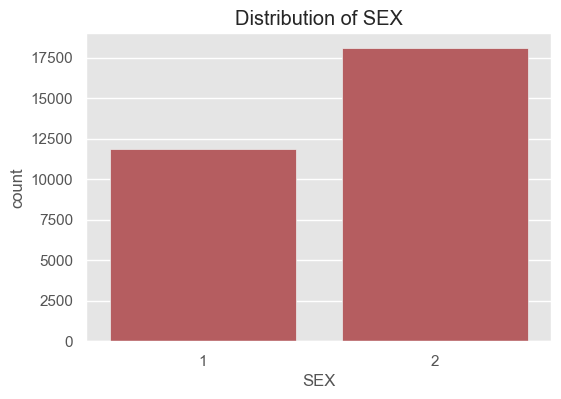

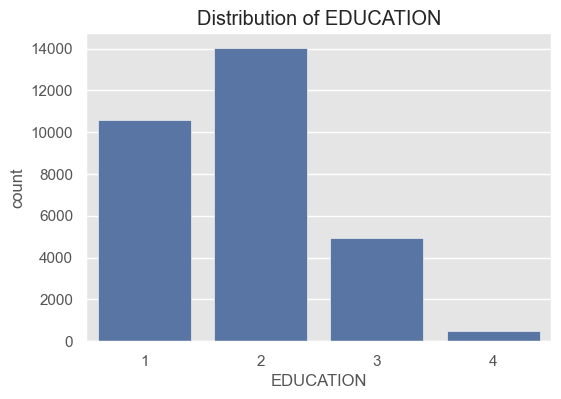

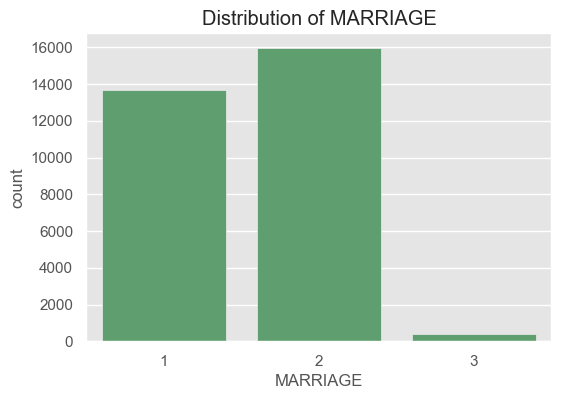

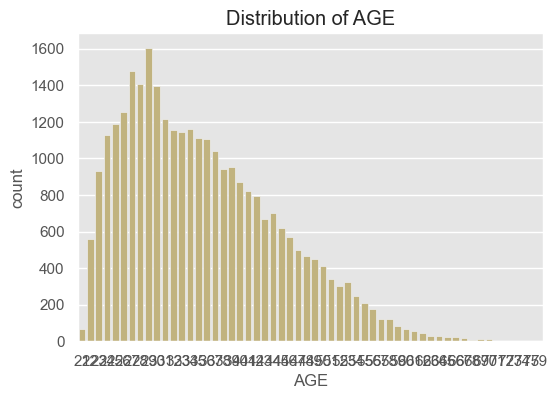

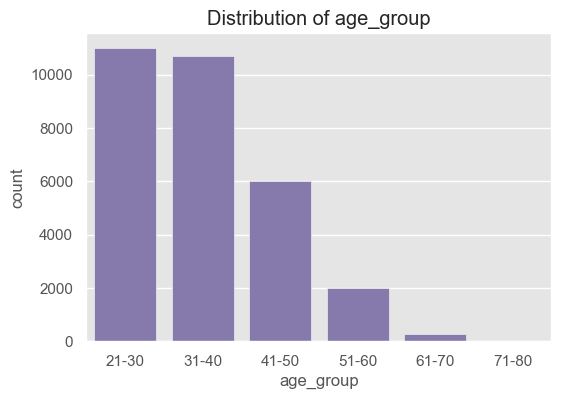

In [63]:

# check sparsity in categorical columns
colors = ['r', 'b', 'g', 'y', 'm', 'c']
for col, c in zip(category_cols, colors):
    plt.style.use('ggplot')
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, color=c)
    plt.title(f'Distribution of {col}')
    plt.show()

In [64]:
# checking about sparse values in numeric columns
sparse_info = {}    
for col in numeric_cols:
    sparse_info[col] = (df[col] == 0).sum() / df.shape[0] * 100  # percentage of zeros   
sparse_info = dict(sorted(sparse_info.items(), key=lambda item: item[1], reverse=True))
sparse_info 
pd.DataFrame(sparse_info, index=['sparsity %']).T   

,sparsity %
PAY_5,90.106667
PAY_6,89.736667
PAY_4,88.300000
PAY_3,85.956667
PAY_2,85.206667
PAY_1,77.273333
PAY_AMT6,23.910000
PAY_AMT5,22.343333
PAY_AMT4,21.360000
PAY_AMT3,19.893333


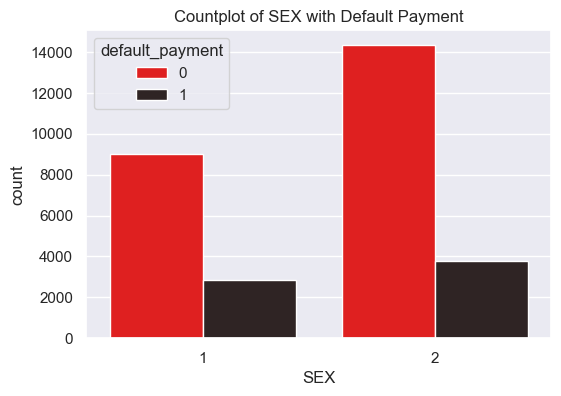

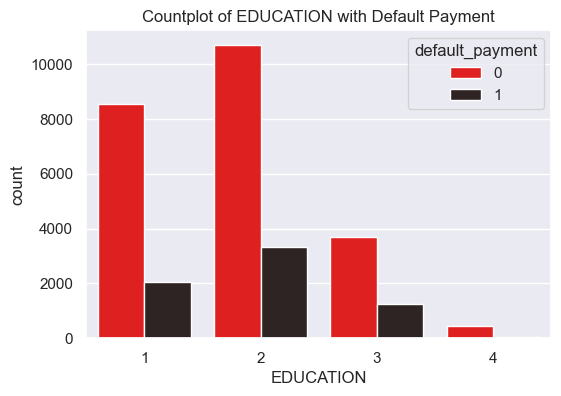

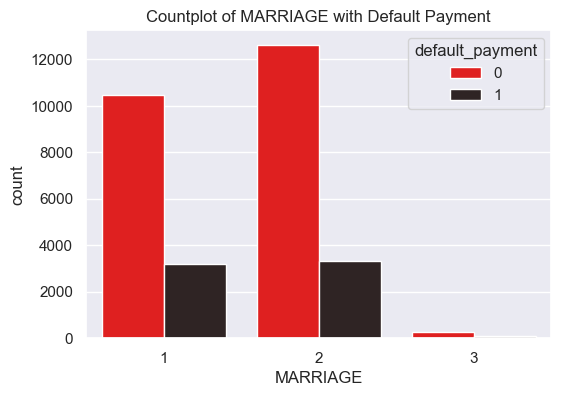

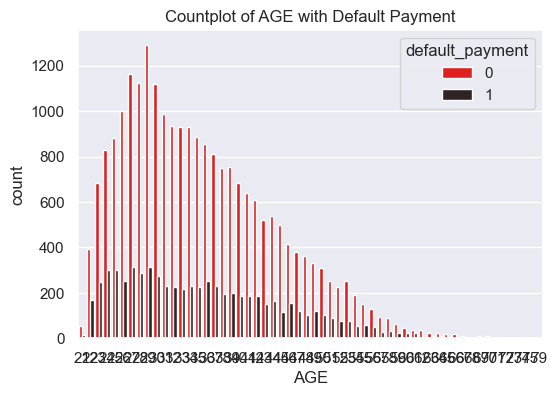

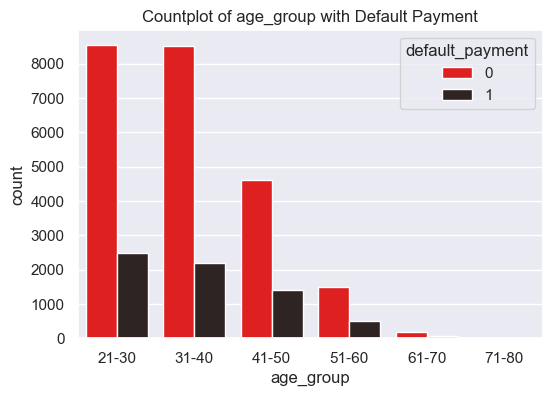

In [65]:
# check relationship between categorical columns and target variable
for col, c in zip(category_cols, colors):
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='default_payment',  palette='dark:red_r')
    plt.title(f'Countplot of {col} with Default Payment')
    plt.show()

In [66]:
def draw_histograms(dataframe, cols, n_rows, n_cols, figsize=(15, 10)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    for i, col in enumerate(cols):
        if i < len(axes):
            sns.histplot(data=dataframe, x=col, kde=True, ax=axes[i], color=random.choice(colors))
            axes[i].set_title(f'Histogram of {col}')
    
    plt.tight_layout()
    plt.show()

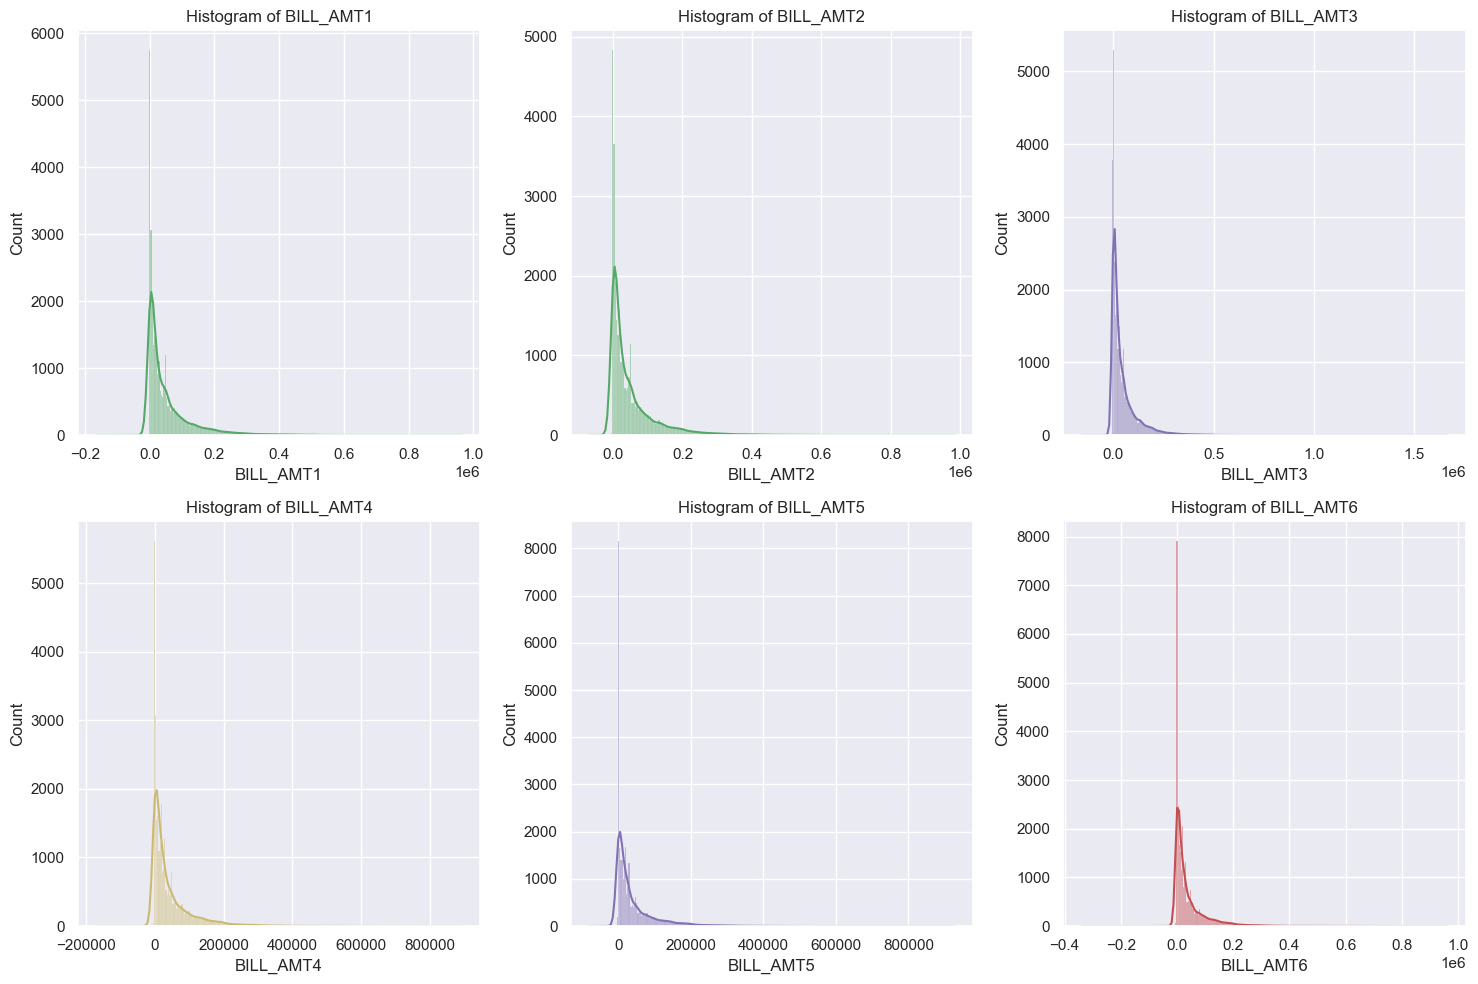

In [67]:
bills = [col for col in numeric_cols if 'BILL_AMT' in col]
draw_histograms(df, bills, 2, 3, figsize=(15, 10))

In [68]:
df[bills].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
90%,142133.700000,136905.500000,1.320513e+05,122418.700000,115883.000000,112110.400000
95%,201203.050000,194792.200000,1.878210e+05,174333.350000,165794.300000,161912.000000
99%,350110.680000,337495.280000,3.250304e+05,304997.270000,285868.330000,279505.060000


In [69]:
# Filter rows where all 'bills' columns are less than their respective 99th percentile
bills_99 = {col: df[col].quantile(0.99) for col in bills}
rows_under_99 = df[(df[bills] < pd.Series(bills_99)).all(axis=1)]
rows_under_99.shape

(29468, 26)

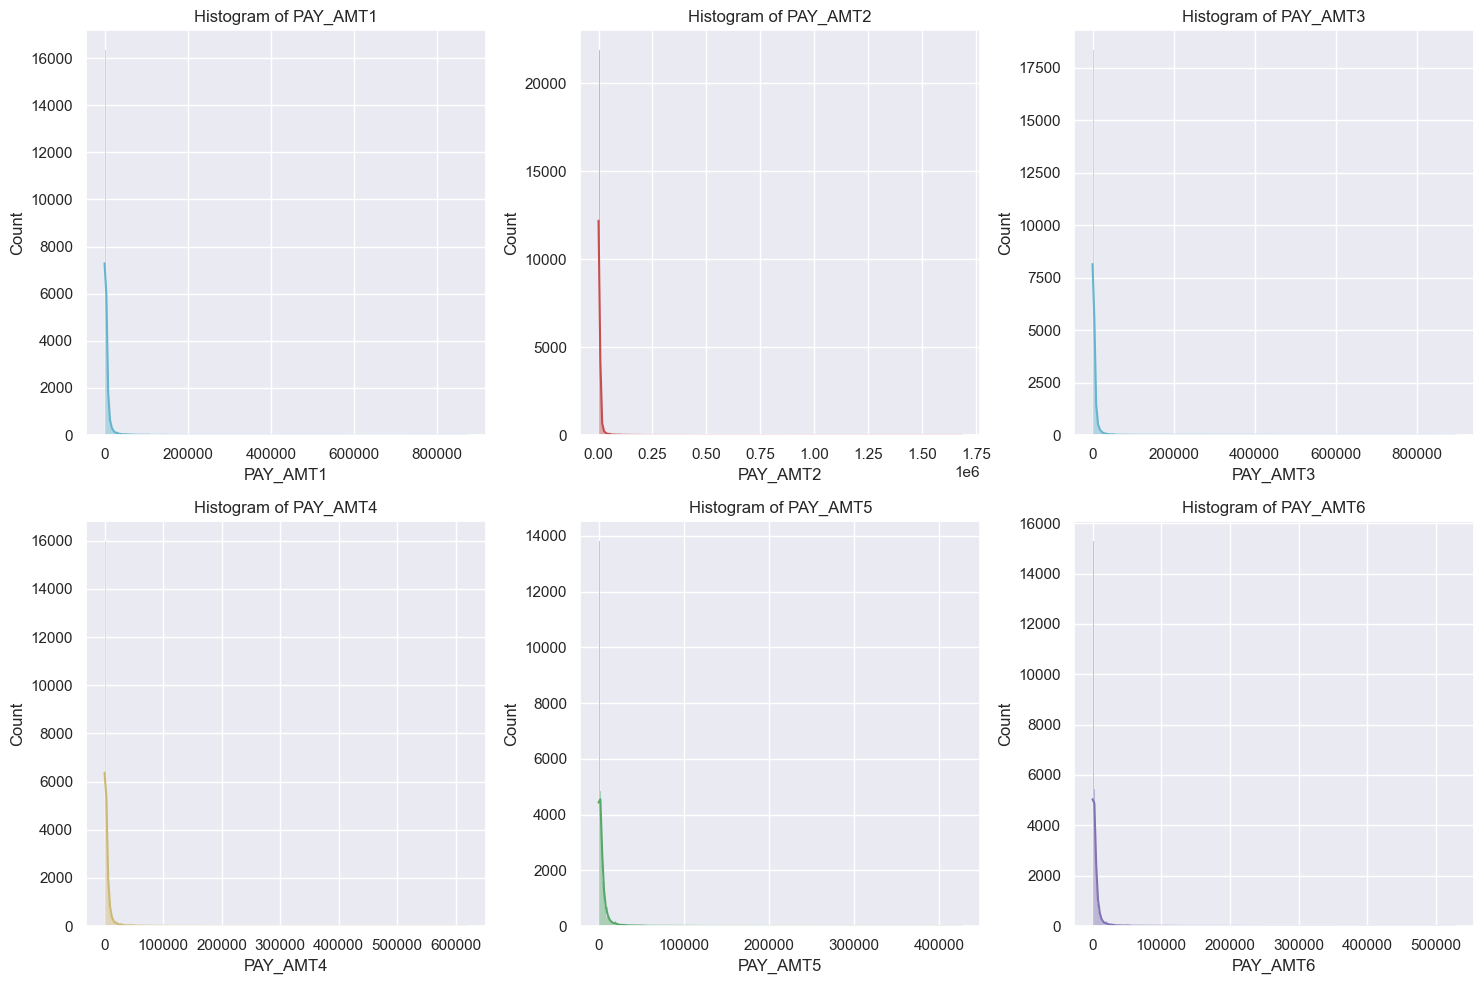

In [70]:
previous = [col for col in numeric_cols if 'PAY_AMT' in col]
draw_histograms(df, previous, 2, 3, figsize=(15, 10))

In [71]:
df[previous].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
90%,10300.000000,1.040110e+04,10000.00000,9570.600000,9500.000000,9600.000000
95%,18428.200000,1.900435e+04,17589.40000,16014.950000,16000.000000,17343.800000
99%,66522.180000,7.665102e+04,70000.00000,67054.440000,65607.560000,82619.050000


In [72]:
def draw_boxplots(dataframe, cols, n_rows, n_cols, figsize=(15, 10)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    for i, col in enumerate(cols):
        if i < len(axes):
            sns.boxplot(data=dataframe, x=col, ax=axes[i], color=random.choice(colors))
            axes[i].set_title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()


In [73]:
# Filter rows where all 'previous' columns are less than their respective 99th percentile
previous_95 = {col: df[col].quantile(0.95) for col in previous}
previous_95 = df[(df[previous] < pd.Series(previous_95)).all(axis=1)]
previous_95.shape


(24271, 26)

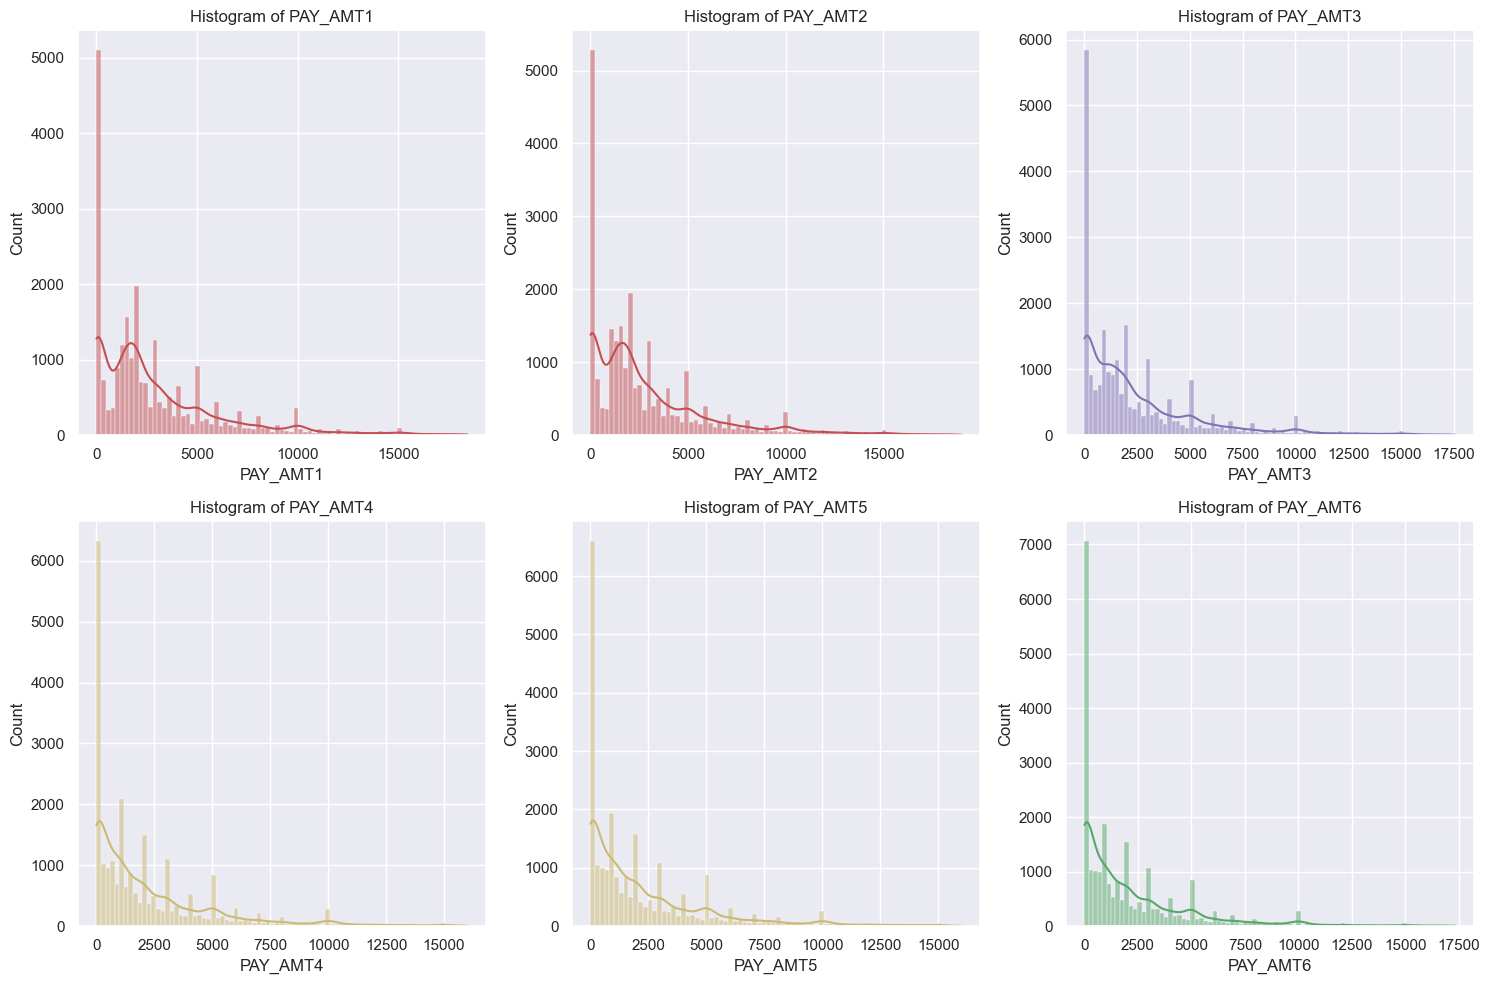

In [74]:
 
draw_histograms(previous_95, previous, 2, 3, figsize=(15,10))

In [75]:
# above histograms, highly skewed distribution is observed in all the previous payment amount columns after removing the extreme outliers.

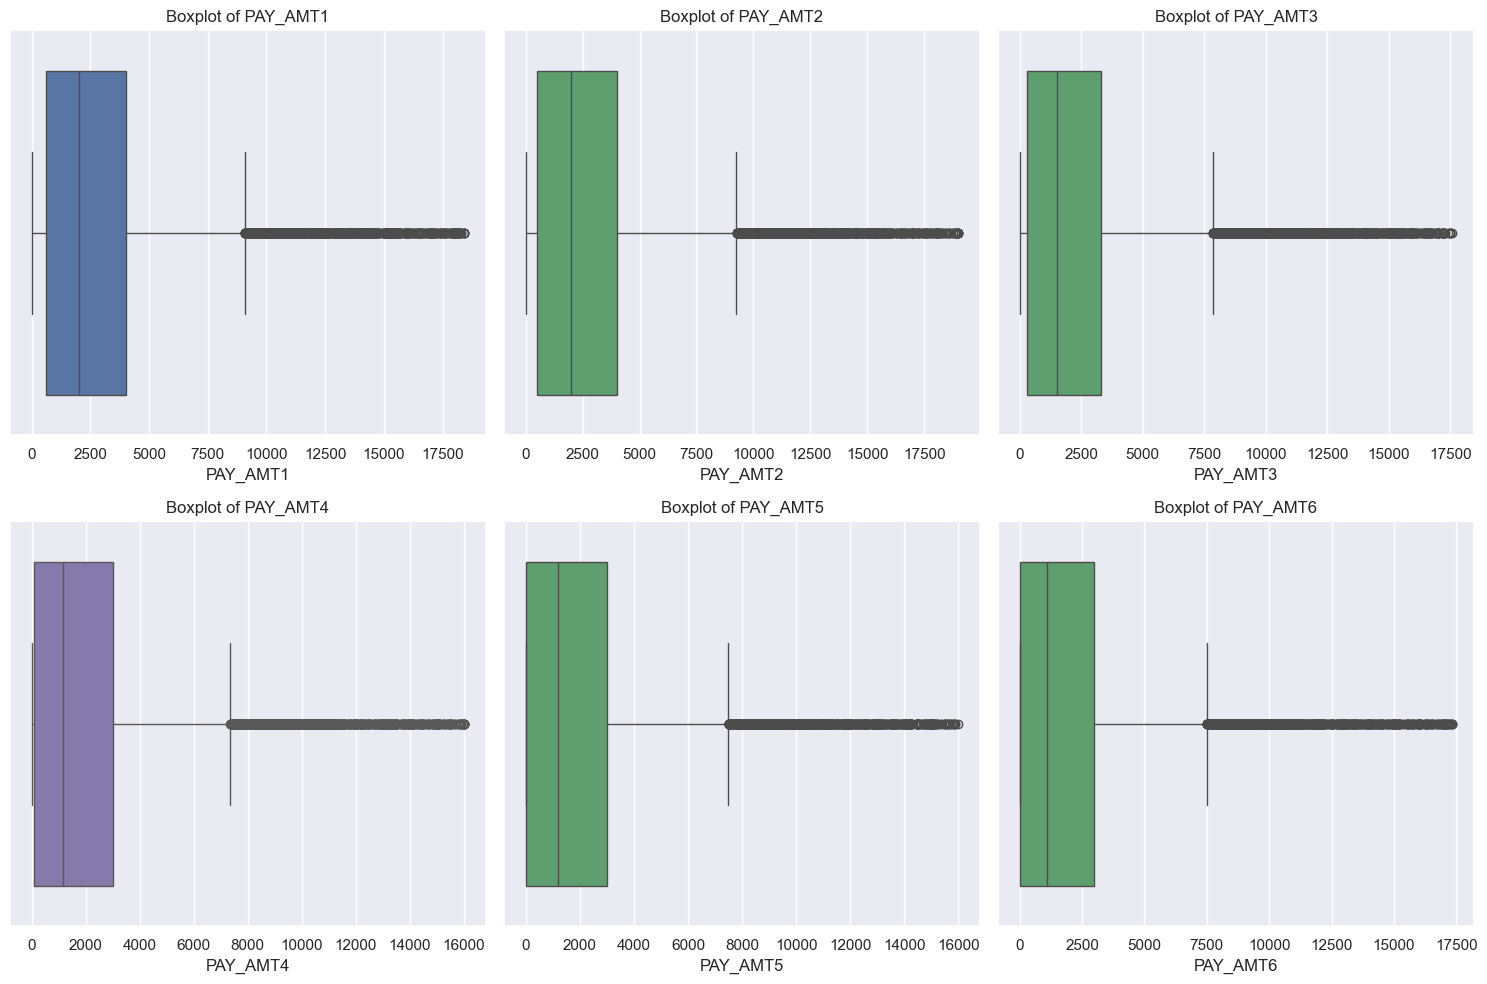

In [76]:
draw_boxplots(previous_95, previous, 2, 3, figsize=(15, 10))

In [77]:
# from above boxplots we can see that there are still some outliers in the data but they are not that significant. So we can keep them as it is.    

In [78]:
df[df[previous].sum(axis=1) == 0].head()  # customers who never paid anything in last 6 months

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,age_group
18,19,360000.0,2,1,1,49,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41-50
19,20,180000.0,2,1,2,29,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,21-30
45,46,210000.0,1,1,2,29,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,21-30
79,80,240000.0,2,2,2,44,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,41-50
109,110,360000.0,1,2,1,35,1,0,0,0,...,-103.0,-103.0,0.0,0.0,0.0,0.0,0.0,0.0,0,31-40


In [79]:
for i in range(5):
    print(df['PAY_' + str(i+1)].value_counts())

PAY_1
0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: count, dtype: int64
PAY_2
0    25562
2     3927
3      326
4       99
1       28
5       25
7       20
6       12
8        1
Name: count, dtype: int64
PAY_3
0    25787
2     3819
3      240
4       76
7       27
6       23
5       21
1        4
8        3
Name: count, dtype: int64
PAY_4
0    26490
2     3159
3      180
4       69
7       58
5       35
6        5
1        2
8        2
Name: count, dtype: int64
PAY_5
0    27032
2     2626
3      178
4       84
7       58
5       17
6        4
8        1
Name: count, dtype: int64


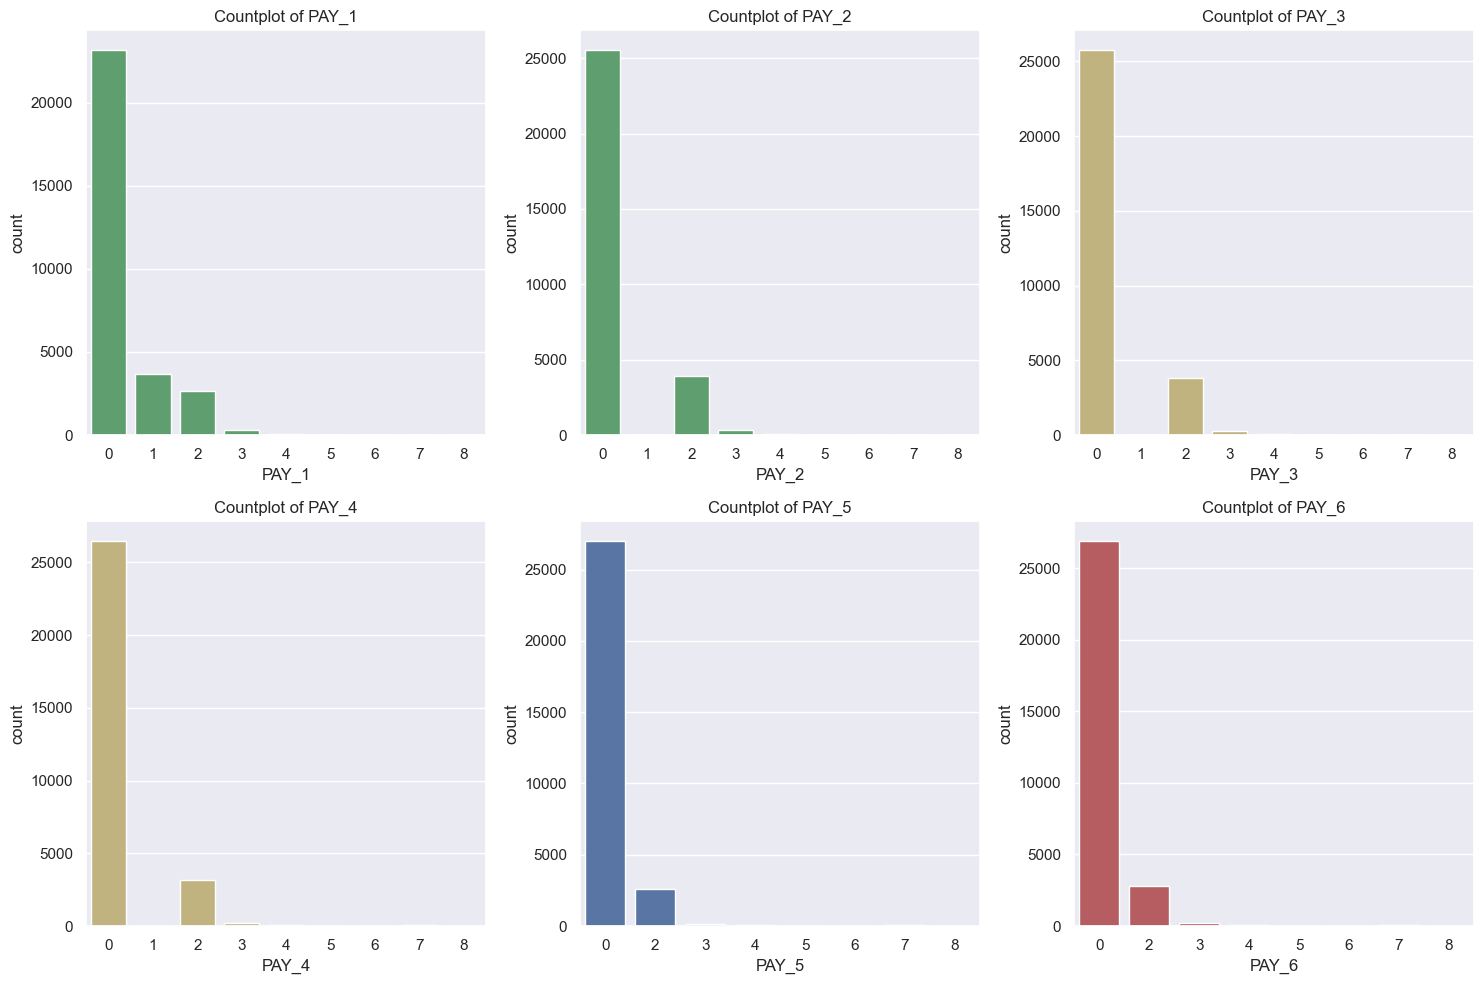

In [80]:
def draw_barplots(dataframe, cols, n_rows, n_cols, figsize=(15, 10)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    for i, col in enumerate(cols):
        if i < len(axes):
            sns.countplot(data=dataframe, x=col, ax=axes[i], color=random.choice(colors))
            axes[i].set_title(f'Countplot of {col}')
    
    plt.tight_layout()
    plt.show()

draw_barplots(df, [f'PAY_{i+1}' for i in range(6)], 2, 3, figsize=(15, 10))

In [81]:
df.iloc[:, 1:12]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,20000.0,2,2,1,24,2,2,0,0,0,0
1,120000.0,2,2,2,26,0,2,0,0,0,2
2,90000.0,2,2,2,34,0,0,0,0,0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,0
29996,150000.0,1,3,2,43,0,0,0,0,0,0
29997,30000.0,1,2,2,37,4,3,2,0,0,0
29998,80000.0,1,3,1,41,1,0,0,0,0,0


In [82]:
df.iloc[:, 12:]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,age_group
0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,21-30
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,21-30
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,31-40
3,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,31-40
4,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,31-40
29996,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,41-50
29997,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,31-40
29998,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,41-50


In [83]:
df['default_payment'].value_counts(normalize=True) * 100  # percentage of default payment

default_payment
0    77.88
1    22.12
Name: proportion, dtype: float64

In [84]:
df[df['LIMIT_BAL'] > 500000].shape

(206, 26)

In [86]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment', 'age_group'],
      dtype='object')

In [87]:
df['default_payment'].value_counts()

default_payment
0    23364
1     6636
Name: count, dtype: int64

In [93]:
df['LIMIT_BAL'].median()

np.float64(140000.0)

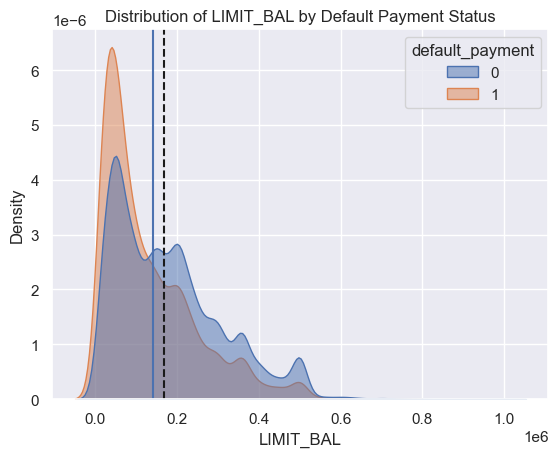

In [92]:
sns.kdeplot(data=df, x='LIMIT_BAL', hue='default_payment', fill=True, common_norm=False, alpha=0.5)
plt.axvline(x=df['LIMIT_BAL'].mean(), color='k', linestyle='--', label='Mean LIMIT_BAL')
plt.axvline(x=df['LIMIT_BAL'].median(), color='b', linestyle='-', label='Median LIMIT_BAL')
plt.title('Distribution of LIMIT_BAL by Default Payment Status')
plt.show()


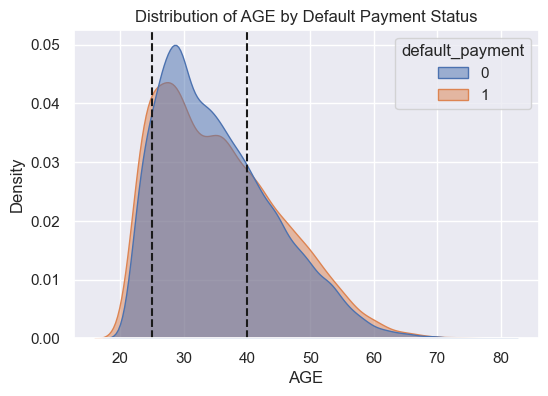

In [98]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(6,4))   
sns.kdeplot(data=df, x='AGE', hue='default_payment', fill=True, common_norm=False, alpha=0.5)
plt.axvline(x=25, color='k', linestyle='--', label='Mean AGE')
plt.axvline(x=40, color='k', linestyle='--', label='Median AGE')
plt.title('Distribution of AGE by Default Payment Status')
plt.show()

In [91]:
pd.crosstab(df['EDUCATION'], df['default_payment'], rownames=['EDUCATION'], colnames=['Defaulted'])

Defaulted,0,1
EDUCATION,,
1,8549,2036
2,10700,3330
3,3680,1237
4,435,33
